<a href="https://colab.research.google.com/github/yasmincetn/fake-news-detection-ann/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import pandas as pd

# Download dataset
dataset_path = kagglehub.dataset_download("algord/fake-news")

print("Dataset path:", dataset_path)
print("Files:", os.listdir(dataset_path))

# Find CSV file automatically
csv_file = None
for file in os.listdir(dataset_path):
    if file.endswith(".csv"):
        csv_file = file
        break

if csv_file is None:
    raise FileNotFoundError("CSV file not found in dataset directory!")

csv_path = os.path.join(dataset_path, csv_file)

# Load dataset
df = pd.read_csv(csv_path)

df.head()


100%|██████████| 1.68M/1.68M [00:00<00:00, 91.4MB/s]

Extracting files...
Dataset path: /root/.cache/kagglehub/datasets/algord/fake-news/versions/1
Files: ['FakeNewsNet.csv']


,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [ ]:
# Number of rows and columns
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Feature columns
print("\nFeature columns:")
for col in df.columns:
    print("-", col)

# Target variable
print("\nTarget variable:")
print("real (1 = Real news, 0 = Fake news)")

# Class distribution
print("\nClass distribution:")
print(df['real'].value_counts())


Number of rows: 23196
Number of columns: 5

Feature columns:
- title
- news_url
- source_domain
- tweet_num
- real

Target variable:
real (1 = Real news, 0 = Fake news)

Class distribution:
real
1    17441
0     5755
Name: count, dtype: int64


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
VOCAB_SIZE = 5000

tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df['title'])

# Metni integer sequence'lere çevir
sequences = tokenizer.texts_to_sequences(df['title'])

# -------------------------------
# 2) Multi-hot vectorization (IMDB lab ile AYNI mantık)
# -------------------------------
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for idx in sequence:
            if idx < dimension:
                results[i, idx] = 1.0
    return results

X_text = vectorize_sequences(sequences, VOCAB_SIZE)

# -------------------------------
# 3) Sayısal feature ekleme
# -------------------------------
X_num = df[['tweet_num']].values

# Text + numeric feature birleştirme
X = np.hstack((X_text, X_num))

# Target
y = df['real'].values

print("Input shape:", X.shape)
print("Target shape:", y.shape)



Input shape: (23196, 5001)
Target shape: (23196,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

baseline_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_baseline = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7567 - loss: 0.5920 - val_accuracy: 0.8060 - val_loss: 0.4676
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8378 - loss: 0.5056 - val_accuracy: 0.8405 - val_loss: 0.3920
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.4275 - val_accuracy: 0.8548 - val_loss: 0.4034
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8902 - loss: 0.3543 - val_accuracy: 0.8646 - val_loss: 0.3592
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9070 - loss: 0.3286 - val_accuracy: 0.8600 - val_loss: 0.3433
Epoch 6/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9189 - loss: 0.2597 - val_accuracy: 0.8560 - val_loss: 0.6835
Epoch 7/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9243 - loss: 0.3012 - val_accuracy: 0.8548 - val_loss: 0.3623
Epoch 8/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9322 - loss: 0.2234 - val_accuracy: 0.

In [ ]:
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(
    X_test, y_test, verbose=1
)

print("Baseline Test Loss:", baseline_test_loss)
print("Baseline Test Accuracy:", baseline_test_acc)


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8370 - loss: 0.4407
Baseline Test Loss: 0.4195951819419861
Baseline Test Accuracy: 0.8459770083427429


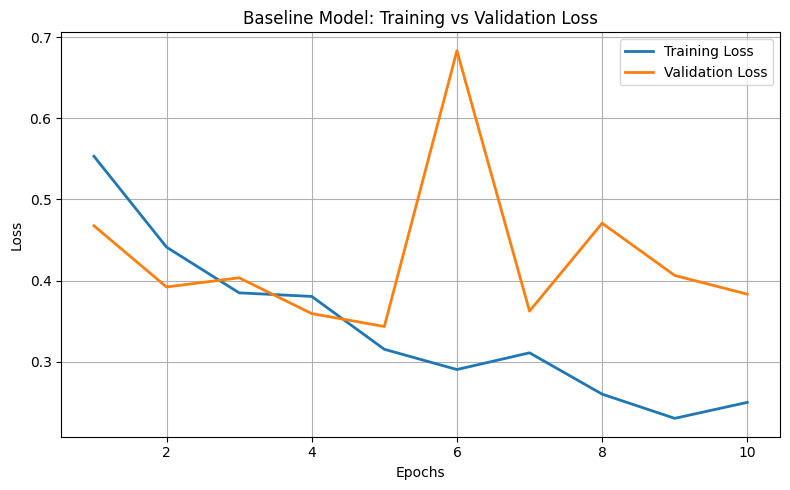

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_baseline.history['loss']) + 1)

plt.figure(figsize=(8, 5))

plt.plot(epochs,
         history_baseline.history['loss'],
         label='Training Loss',
         linewidth=2)

plt.plot(epochs,
         history_baseline.history['val_loss'],
         label='Validation Loss',
         linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Baseline Model: Training vs Validation Loss')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --- EXPERIMENT 1: DEEPER NETWORK ---
model_exp1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_exp1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_exp1 = model_exp1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7568 - loss: 0.6287 - val_accuracy: 0.8339 - val_loss: 0.5620
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8806 - loss: 0.3957 - val_accuracy: 0.8508 - val_loss: 0.3994
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9033 - loss: 0.3363 - val_accuracy: 0.8707 - val_loss: 0.3372
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9331 - loss: 0.1948 - val_accuracy: 0.8508 - val_loss: 0.3683
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9343 - loss: 0.1907 - val_accuracy: 0.8560 - val_loss: 0.4638
Epoch 6/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9533 - loss: 0.1379 - val_accuracy: 0.8640 - val_loss: 0.4149
Epoch 7/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9577 - loss: 0.1321 - val_accuracy: 0.8592 - val_loss: 0.4900
Epoch 8/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9633 - loss: 0.1011 - val_accuracy: 0.

In [ ]:
exp1_test_loss, exp1_test_acc = model_exp1.evaluate(
    X_test, y_test, verbose=0
)

print("Experiment 1 Test Loss:", exp1_test_loss)
print("Experiment 1 Test Accuracy:", exp1_test_acc)


Experiment 1 Test Loss: 0.6460620164871216
Experiment 1 Test Accuracy: 0.8635057210922241


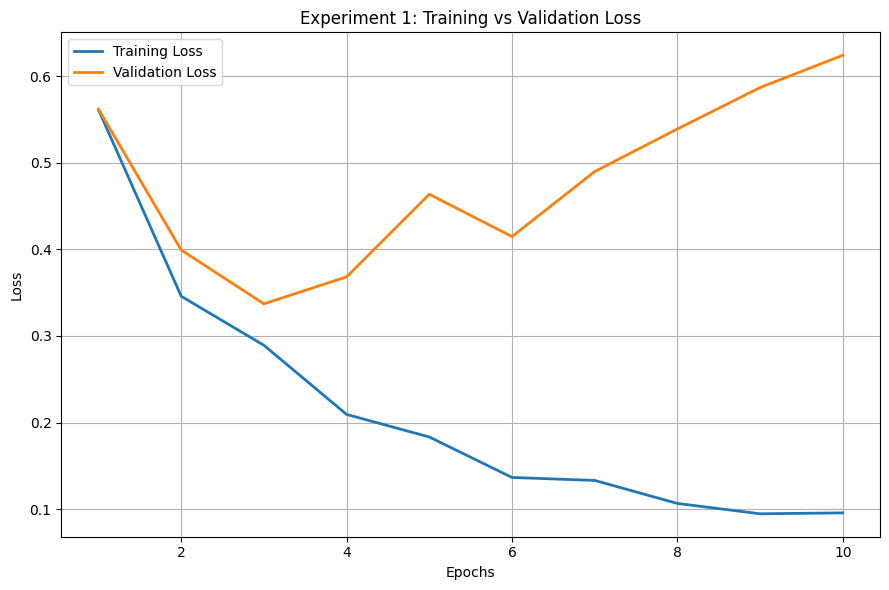

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_exp1.history['loss']) + 1)

plt.figure(figsize=(9, 6))

plt.plot(
    epochs,
    history_exp1.history['loss'],
    label='Training Loss',
    linewidth=2
)

plt.plot(
    epochs,
    history_exp1.history['val_loss'],
    label='Validation Loss',
    linewidth=2
)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Experiment 1: Training vs Validation Loss')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

results_table = pd.DataFrame({
    "Model": [
        "Baseline",
        "Experiment 1"
    ],
    "Architecture": [
        "1 Hidden Layer (16 units)",
        "2 Hidden Layers (32 + 16 units)"
    ],
    "Change Made": [
        "None",
        "Increased number of hidden layers"
    ],
    "Test Loss": [
        baseline_test_loss,
        exp1_test_loss
    ],
    "Test Accuracy": [
        baseline_test_acc,
        exp1_test_acc
    ]
})

results_table


,Model,Architecture,Change Made,Test Loss,Test Accuracy
0,Baseline,1 Hidden Layer (16 units),None,0.419595,0.845977
1,Experiment 1,2 Hidden Layers (32 + 16 units),Increased number of hidden layers,0.646062,0.863506


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- EXPERIMENT 2: DEEP MODEL + DROPOUT ---
model_exp2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),          # Dropout after first hidden layer
    Dense(16, activation='relu'),
    Dropout(0.5),          # Dropout after second hidden layer
    Dense(1, activation='sigmoid')
])

model_exp2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_exp2 = model_exp2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32          # Sabit tutuluyor
)



Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6936 - loss: 0.7555 - val_accuracy: 0.7646 - val_loss: 0.4828
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7689 - loss: 0.4944 - val_accuracy: 0.8275 - val_loss: 0.3961
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8201 - loss: 0.4033 - val_accuracy: 0.8439 - val_loss: 0.3597
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8375 - loss: 0.3619 - val_accuracy: 0.8459 - val_loss: 0.3639
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8511 - loss: 0.3337 - val_accuracy: 0.8433 - val_loss: 0.3543
Epoch 6/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8692 - loss: 0.3095 - val_accuracy: 0.8643 - val_loss: 0.3609
Epoch 7/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 0.2869 - val_accuracy: 0.8500 - val_loss: 0.3721
Epoch 8/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8881 - loss: 0.2675 - val_accuracy: 0.

In [ ]:
exp2_test_loss, exp2_test_acc = model_exp2.evaluate(
    X_test, y_test, verbose=0
)

print("Experiment 2 Test Loss:", exp2_test_loss)
print("Experiment 2 Test Accuracy:", exp2_test_acc)


Experiment 2 Test Loss: 0.4550052583217621
Experiment 2 Test Accuracy: 0.8396551609039307


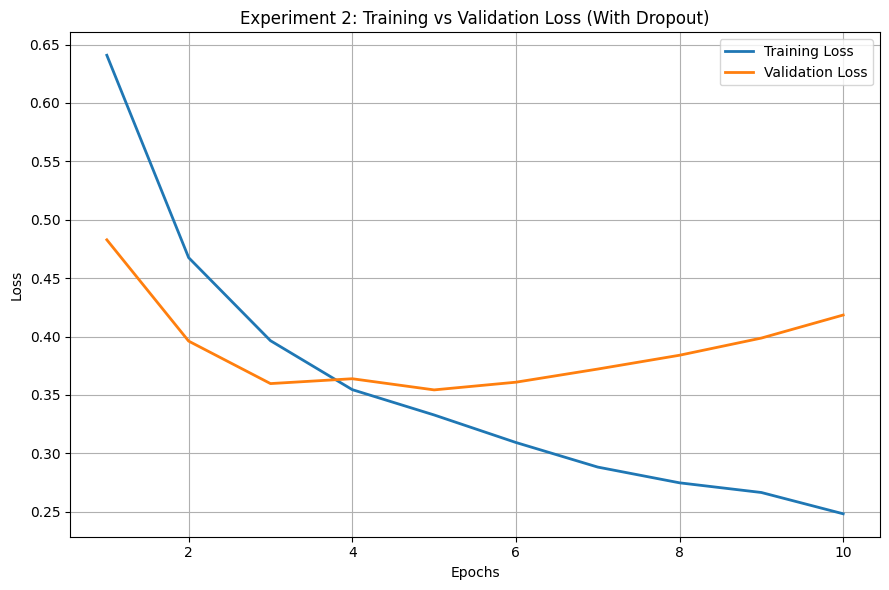

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_exp2.history['loss']) + 1)

plt.figure(figsize=(9, 6))

plt.plot(epochs, history_exp2.history['loss'],
         label='Training Loss', linewidth=2)

plt.plot(epochs, history_exp2.history['val_loss'],
         label='Validation Loss', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Experiment 2: Training vs Validation Loss (With Dropout)')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

results_table = pd.DataFrame({
    "Model": [
        "Baseline",
        "Experiment 1",
        "Experiment 2"
    ],
    "Architecture": [
        "1 Hidden Layer (16 units)",
        "2 Hidden Layers (32 + 16 units)",
        "2 Hidden Layers (32 + 16 units) + Dropout(0.5)"
    ],
    "Change Made": [
        "None",
        "Increased number of hidden layers",
        "Added Dropout regularization"
    ],
    "Test Loss": [
        baseline_test_loss,
        exp1_test_loss,
        exp2_test_loss
    ],
    "Test Accuracy": [
        baseline_test_acc,
        exp1_test_acc,
        exp2_test_acc
    ]
})

results_table


,Model,Architecture,Change Made,Test Loss,Test Accuracy
0,Baseline,1 Hidden Layer (16 units),None,0.396941,0.849425
1,Experiment 1,2 Hidden Layers (32 + 16 units),Increased number of hidden layers,0.619464,0.858908
2,Experiment 2,2 Hidden Layers (32 + 16 units) + Dropout(0.5),Added Dropout regularization,0.455005,0.839655


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- EXPERIMENT 3: DROPOUT MODEL + 20 EPOCHS ---
model_exp3 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_exp3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_exp3 = model_exp3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
508/508 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6780 - loss: 0.8457 - val_accuracy: 0.7580 - val_loss: 0.4984
Epoch 2/20
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7949 - loss: 0.4870 - val_accuracy: 0.8353 - val_loss: 0.4037
Epoch 3/20
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.4004 - val_accuracy: 0.8459 - val_loss: 0.3713
Epoch 4/20
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8599 - loss: 0.3672 - val_accuracy: 0.8497 - val_loss: 0.3585
Epoch 5/20
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8715 - loss: 0.3278 - val_accuracy: 0.8497 - val_loss: 0.3607
Epoch 6/20
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8767 - loss: 0.3092 - val_accuracy: 0.8482 - val_loss: 0.3709
Epoch 7/20
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8870 - loss: 0.2837 - val_accuracy: 0.8488 - val_loss: 0.3842
Epoch 8/20
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8923 - loss: 0.2705 - val_accuracy: 0.

In [ ]:
exp3_test_loss, exp3_test_acc = model_exp3.evaluate(
    X_test, y_test, verbose=0
)

print("Experiment 3 Test Loss:", exp3_test_loss)
print("Experiment 3 Test Accuracy:", exp3_test_acc)


Experiment 3 Test Loss: 0.6247683763504028
Experiment 3 Test Accuracy: 0.8416666388511658


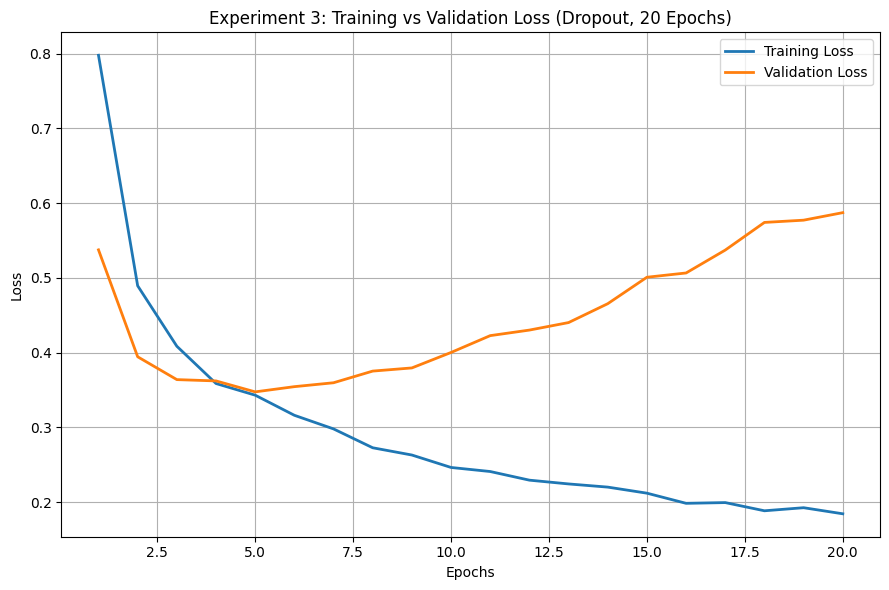

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_exp3.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, history_exp3.history['loss'],
         label='Training Loss', linewidth=2)
plt.plot(epochs, history_exp3.history['val_loss'],
         label='Validation Loss', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Experiment 3: Training vs Validation Loss (Dropout, 20 Epochs)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- EXPERIMENT 4: SAME MODEL, DIFFERENT OPTIMIZER (RMSprop) ---
model_exp4 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_exp4.compile(
    optimizer='rmsprop',          # 🔴 TEK DEĞİŞİKLİK
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_exp4 = model_exp4.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6573 - loss: 0.7788 - val_accuracy: 0.7652 - val_loss: 0.5169
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7720 - loss: 0.5164 - val_accuracy: 0.8172 - val_loss: 0.4192
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8177 - loss: 0.4479 - val_accuracy: 0.8304 - val_loss: 0.3958
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8396 - loss: 0.4219 - val_accuracy: 0.8347 - val_loss: 0.3887
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8535 - loss: 0.3875 - val_accuracy: 0.8362 - val_loss: 0.3855
Epoch 6/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8462 - loss: 0.3903 - val_accuracy: 0.8399 - val_loss: 0.3995
Epoch 7/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8545 - loss: 0.4042 - val_accuracy: 0.8431 - val_loss: 0.3864
Epoch 8/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8666 - loss: 0.3700 - val_accuracy: 0.

In [ ]:
exp4_test_loss, exp4_test_acc = model_exp4.evaluate(
    X_test, y_test, verbose=0
)

print("Experiment 4 Test Loss:", exp4_test_loss)
print("Experiment 4 Test Accuracy:", exp4_test_acc)


Experiment 4 Test Loss: 0.37790989875793457
Experiment 4 Test Accuracy: 0.8508620858192444


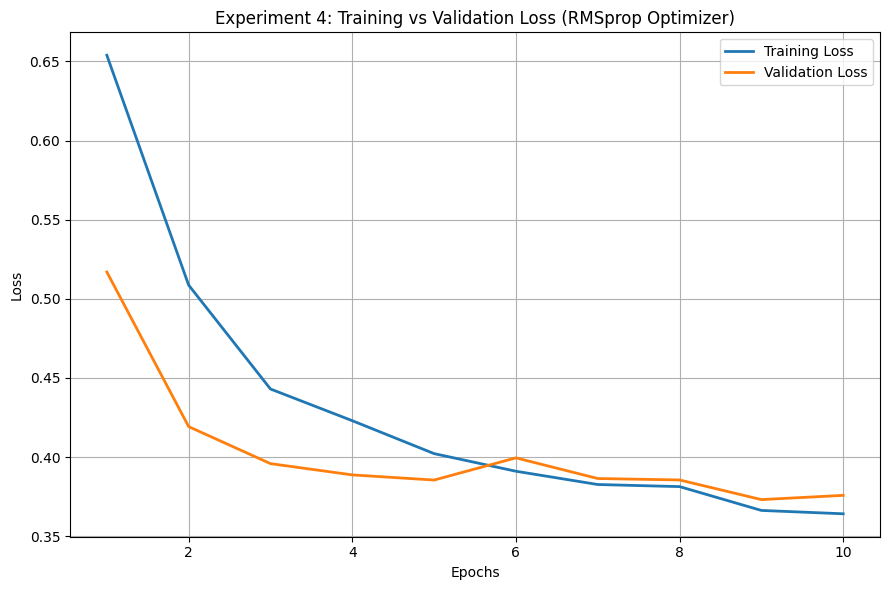

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_exp4.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, history_exp4.history['loss'], label='Training Loss', linewidth=2)
plt.plot(epochs, history_exp4.history['val_loss'], label='Validation Loss', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Experiment 4: Training vs Validation Loss (RMSprop Optimizer)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.5 MB/s eta 0:00:00


In [ ]:
!pip install optuna


In [ ]:
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


In [ ]:
def create_model(trial):
    # ---- Hyperparameters ----
    units_1 = trial.suggest_int("units_1", 16, 128)
    units_2 = trial.suggest_int("units_2", 8, 64)
    dropout_rate = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    optimizer_name = trial.suggest_categorical(
        "optimizer", ["adam", "rmsprop", "sgd"]
    )
    batch_size = trial.suggest_categorical(
        "batch_size", [32, 64, 128, 256]
    )

    # ---- Optimizer seçimi ----
    if optimizer_name == "adam":
        optimizer = Adam(learning_rate=lr)
    elif optimizer_name == "rmsprop":
        optimizer = RMSprop(learning_rate=lr)
    else:
        optimizer = SGD(learning_rate=lr)

    # ---- Model ----
    model = Sequential([
        Dense(units_1, activation="relu", input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(units_2, activation="relu"),
        Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model, batch_size


In [ ]:
def objective(trial):
    model, batch_size = create_model(trial)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=8,              # SABİT (adil karşılaştırma)
        batch_size=batch_size,
        verbose=0
    )

    # Son epoch validation accuracy
    val_acc = history.history["val_accuracy"][-1]
    return val_acc


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)


[I 2025-12-15 16:18:43,092] A new study created in memory with name: no-name-7c1f3701-a779-4ed3-a011-6a5af7ccbfbc
[I 2025-12-15 16:18:54,784] Trial 0 finished with value: 0.8522564172744751 and parameters: {'units_1': 35, 'units_2': 47, 'dropout': 0.41072497915937967, 'lr': 0.003699190628706042, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 0 with value: 0.8522564172744751.
[I 2025-12-15 16:19:05,657] Trial 1 finished with value: 0.8640413880348206 and parameters: {'units_1': 116, 'units_2': 58, 'dropout': 0.24781781603072642, 'lr': 0.0010050992607986266, 'optimizer': 'adam', 'batch_size': 256}. Best is trial 1 with value: 0.8640413880348206.
[I 2025-12-15 16:19:23,940] Trial 2 finished with value: 0.8657660484313965 and parameters: {'units_1': 29, 'units_2': 55, 'dropout': 0.4608947782717574, 'lr': 0.0017851110790947766, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 2 with value: 0.8657660484313965.
[I 2025-12-15 16:19:32,939] Trial 3 finished with value: 0.85081923007

In [ ]:
print("Best Validation Accuracy:", study.best_value)
print("Best Hyperparameters:")
study.best_params


Best Validation Accuracy: 0.8657660484313965
Best Hyperparameters:


{'units_1': 29,
 'units_2': 55,
 'dropout': 0.4608947782717574,
 'lr': 0.0017851110790947766,
 'optimizer': 'adam',
 'batch_size': 64}

In [ ]:
best_params = study.best_params

# Optimizer
if best_params["optimizer"] == "adam":
    best_optimizer = Adam(best_params["lr"])
elif best_params["optimizer"] == "rmsprop":
    best_optimizer = RMSprop(best_params["lr"])
else:
    best_optimizer = SGD(best_params["lr"])

# Final model
best_model = Sequential([
    Dense(best_params["units_1"], activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(best_params["dropout"]),
    Dense(best_params["units_2"], activation="relu"),
    Dense(1, activation="sigmoid")
])

best_model.compile(
    optimizer=best_optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

best_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=best_params["batch_size"],
    validation_data=(X_val, y_val),
    verbose=0
)

test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)

print("Optuna Test Loss:", test_loss)
print("Optuna Test Accuracy:", test_acc)


Optuna Test Loss: 0.4436485767364502
Optuna Test Accuracy: 0.8462643623352051


In [ ]:
import pandas as pd

exp5_table = pd.DataFrame({
    "Experiment": ["Experiment 5 (Optuna)"],
    "Architecture": [
        f"Dense({best_params['units_1']}) + Dropout({best_params['dropout']:.2f}) + Dense({best_params['units_2']})"
    ],
    "Optimizer": [best_params["optimizer"]],
    "Learning Rate": [best_params["lr"]],
    "Batch Size": [best_params["batch_size"]],
    "Test Loss": [test_loss],
    "Test Accuracy": [test_acc]
})

exp5_table


,Experiment,Architecture,Optimizer,Learning Rate,Batch Size,Test Loss,Test Accuracy
0,Experiment 5 (Optuna),Dense(29) + Dropout(0.46) + Dense(55),adam,0.001785,64,0.443649,0.846264


In [ ]:
history_optuna = best_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=best_params["batch_size"],
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9146 - loss: 0.1848 - val_accuracy: 0.8494 - val_loss: 0.4239
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.1742 - val_accuracy: 0.8431 - val_loss: 0.4584
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9153 - loss: 0.1764 - val_accuracy: 0.8459 - val_loss: 0.4542
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9183 - loss: 0.1645 - val_accuracy: 0.8465 - val_loss: 0.4793
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.1522 - val_accuracy: 0.8479 - val_loss: 0.4829
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.1474 - val_accuracy: 0.8456 - val_loss: 0.4944
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9219 - loss: 0.1507 - val_accuracy: 0.8615 - val_loss: 0.5117
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9310 - loss: 0.1413 - val_accuracy: 0.

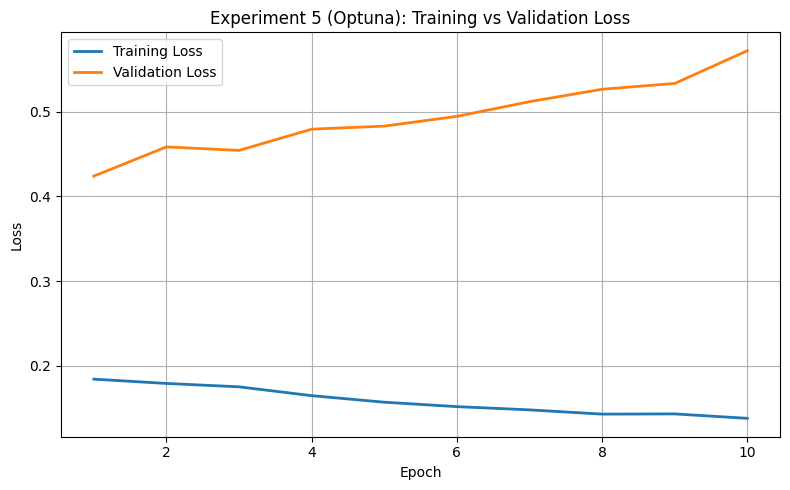

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_optuna.history['loss']) + 1)

plt.figure(figsize=(8, 5))

plt.plot(
    epochs,
    history_optuna.history['loss'],
    label='Training Loss',
    linewidth=2
)

plt.plot(
    epochs,
    history_optuna.history['val_loss'],
    label='Validation Loss',
    linewidth=2
)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Experiment 5 (Optuna): Training vs Validation Loss')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
